## Material do curso de nivelamento em *Deep Learning* do professor Edson M. Takashi (FACOM - UFMS)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

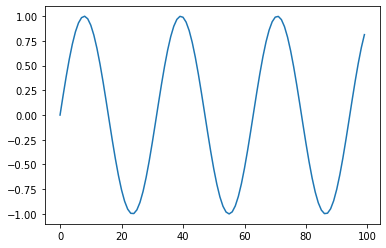

In [ ]:
x = np.arange(100)
denominator = 5
plt.plot(x, np.sin(x/denominator))

$$ P(k,2i) = seno(\frac{k}{n^{2i/d}}) $$
$$ P(k,2i+1) = cosseno(\frac{k}{n^{2i/d}}) $$

$k$ é a posição do token na sequencia (tamanho da sequencia), 
$0 \leq i < d/2$ e  são as colunas e $d$  é o tamanho do embedding.
$n=10000$ pelos autores do "attention is all you need".

Na primeira coluna o denominador $n^{0} = 1$. Quando i está na última coluna, o denominador se aproxima de $n^{d/d} = n$. Nas colunas intermediárias o denominador cresce com i.


In [ ]:
def getPositionEncoding_(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):                # linha
        for i in np.arange(int(d/2)):       # coluna
            denominator = np.power(n, 2*i/d)
            P[k, 2*i]   = denominator
            P[k, 2*i+1] = denominator
    return P

In [ ]:
P = getPositionEncoding_(seq_len=1, d=100, n=10000)

In [ ]:
P

array([[1.00000000e+00, 1.00000000e+00, 1.20226443e+00, 1.20226443e+00,
        1.44543977e+00, 1.44543977e+00, 1.73780083e+00, 1.73780083e+00,
        2.08929613e+00, 2.08929613e+00, 2.51188643e+00, 2.51188643e+00,
        3.01995172e+00, 3.01995172e+00, 3.63078055e+00, 3.63078055e+00,
        4.36515832e+00, 4.36515832e+00, 5.24807460e+00, 5.24807460e+00,
        6.30957344e+00, 6.30957344e+00, 7.58577575e+00, 7.58577575e+00,
        9.12010839e+00, 9.12010839e+00, 1.09647820e+01, 1.09647820e+01,
        1.31825674e+01, 1.31825674e+01, 1.58489319e+01, 1.58489319e+01,
        1.90546072e+01, 1.90546072e+01, 2.29086765e+01, 2.29086765e+01,
        2.75422870e+01, 2.75422870e+01, 3.31131121e+01, 3.31131121e+01,
        3.98107171e+01, 3.98107171e+01, 4.78630092e+01, 4.78630092e+01,
        5.75439937e+01, 5.75439937e+01, 6.91830971e+01, 6.91830971e+01,
        8.31763771e+01, 8.31763771e+01, 1.00000000e+02, 1.00000000e+02,
        1.20226443e+02, 1.20226443e+02, 1.44543977e+02, 1.445439

In [ ]:
# codigo obtido de https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/

 
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):                # linha
        for i in np.arange(int(d/2)):       # coluna
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P
 
P = getPositionEncoding(seq_len=20, d=4, n=10)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.31098359  0.95041528]
 [ 0.90929743 -0.41614684  0.59112712  0.80657841]
 [ 0.14112001 -0.9899925   0.8126489   0.58275361]
 [-0.7568025  -0.65364362  0.95358074  0.30113746]
 [-0.95892427  0.28366219  0.99994652 -0.01034232]
 [-0.2794155   0.96017029  0.94714816 -0.32079646]
 [ 0.6569866   0.75390225  0.80042165 -0.59943739]
 [ 0.98935825 -0.14550003  0.57431777 -0.81863246]
 [ 0.41211849 -0.91113026  0.29125912 -0.9566442 ]
 [-0.54402111 -0.83907153 -0.02068353 -0.99978607]
 [-0.99999021  0.0044257  -0.33057501 -0.94377972]
 [-0.53657292  0.84385396 -0.60768355 -0.79417926]
 [ 0.42016704  0.90744678 -0.82452845 -0.56582049]
 [ 0.99060736  0.13673722 -0.95960533 -0.28134962]
 [ 0.65028784 -0.75968791 -0.99951869  0.03102253]
 [-0.28790332 -0.95765948 -0.94031033  0.3403182 ]
 [-0.96139749 -0.27516334 -0.78785193  0.6158647 ]
 [-0.75098725  0.66031671 -0.5572627   0.83033625]
 [ 0.14987721  0.98870462 -0.27

- Cada linha é um token

In [ ]:
P = getPositionEncoding(seq_len=300, d=512, n=10000)

- Observe que na posição 10 o produto escalar é 256. Ao afastar da posição 10 os valores vão diminuindo

In [ ]:
for i in range(20):
    v = P[10]@P[i]
    print(i,v)

0 173.78972492366344
1 179.45652122444207
2 184.9651413111878
3 187.86499728186047
4 188.24818295827492
5 189.5966676810298
6 196.6882311525795
7 211.74944342769243
8 231.7336203897073
9 249.10209782736297
10 256.0
11 249.10209782736297
12 231.7336203897073
13 211.74944342769248
14 196.68823115257953
15 189.59666768102977
16 188.24818295827492
17 187.8649972818605
18 184.96514131118778
19 179.45652122444204


- Agora observe o que aconte em termos de distância de cosenos entre os vetores

In [ ]:
for i in range(300):
    n1 = P[10]/np.linalg.norm(P[10])
    n2 = P[i]/np.linalg.norm(P[i]) 
    v = n1@n2
    print(i,1-v)

0 0.3211338870169397
1 0.29899796396702316
2 0.27747991675317263
3 0.26615235436773244
4 0.2646555353192386
5 0.25938801687097734
6 0.2316865970602362
7 0.17285373661057646
8 0.09479054535270581
9 0.026944930361863406
10 0.0
11 0.026944930361863406
12 0.09479054535270581
13 0.17285373661057624
14 0.2316865970602362
15 0.25938801687097746
16 0.2646555353192386
17 0.26615235436773244
18 0.27747991675317274
19 0.2989979639670233
20 0.32113388701693957
21 0.33455804598682226
22 0.33809969765578596
23 0.338495160198524
24 0.34351688272060044
25 0.35522031914026087
26 0.3690115810350981
27 0.37857844726550605
28 0.3817125277517971
29 0.38185489164300057
30 0.3844766233056639
31 0.39201631269194814
32 0.4020020471518966
33 0.40973738483589994
34 0.4127517015409109
35 0.4128761963483264
36 0.41426633938298163
37 0.41946368647828747
38 0.42720374514043635
39 0.4338376318664625
40 0.43683458060063585
41 0.43704140971158423
42 0.4377126328776928
43 0.4413883075638071
44 0.44760130144000243
45 0.4

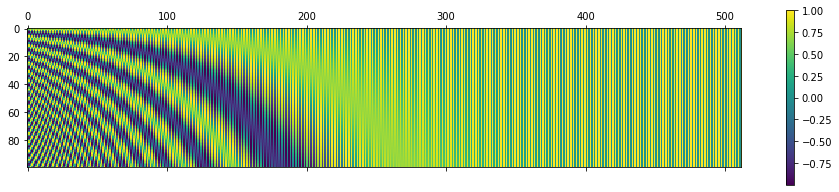

In [ ]:
P = getPositionEncoding(seq_len=100, d=512, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)

1000

## BPE

In [ ]:
!pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 62.2 MB/s eta 0:00:00


In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import BPE

tokenizer = Tokenizer(BPE())

from tokenizers.pre_tokenizers import Whitespace

tokenizer.pre_tokenizer = Whitespace()

In [ ]:
import gensim
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors
import pandas as pd
from nltk.tokenize import word_tokenize,sent_tokenize
import pickle
import nltk

import os

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!gdown https://drive.google.com/uc?id=1-XXx9A7EMCfP5LLLPLk6HIJbaJLDGvNa

Downloading...
From: https://drive.google.com/uc?id=1-XXx9A7EMCfP5LLLPLk6HIJbaJLDGvNa
To: /content/dataset.p
100% 20.7M/20.7M [00:00<00:00, 99.1MB/s]


In [ ]:
corpus = pickle.load(open('dataset.p','rb'))
scorpus = []
for inst in corpus:
    scorpus += sent_tokenize(inst['body'])
    scorpus += sent_tokenize(inst['title'])

fcorpus = []
for inst in scorpus:
    fcorpus += [word_tokenize(inst)]

In [ ]:
from tqdm.auto import tqdm  

text_data = []
file_count = 0

for sample in tqdm(scorpus):
    # remove newline characters from each sample as we need to use exclusively as seperators
    sample = sample.replace('\n', '\s')
    text_data.append(sample)
    if len(text_data) == 5_000:
        # once we hit the 5K mark, save to file
        with open(f'./text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(text_data))
        text_data = []
        file_count += 1
# after saving in 5K chunks, we may have leftover samples, we save those now too
with open(f'./text_{file_count}.txt', 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(text_data))

  0%|          | 0/95435 [00:00<?, ?it/s]

In [ ]:
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 7.2 MB/s eta 0:00:00


In [ ]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.8/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


/usr/local/lib/python3.8/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [ ]:
text_processor.pre_process_doc("hj esta 🔥 😁 :)")

['hj', 'esta', '🔥', '😁', '<happy>']

In [ ]:
from pathlib import Path
paths = [str(x) for x in Path('./').glob('**/*.txt')]
paths

['text_4.txt',
 'text_11.txt',
 'text_8.txt',
 'text_13.txt',
 'text_17.txt',
 'text_12.txt',
 'text_18.txt',
 'text_0.txt',
 'text_19.txt',
 'text_5.txt',
 'text_1.txt',
 'text_14.txt',
 'text_16.txt',
 'text_7.txt',
 'text_3.txt',
 'text_2.txt',
 'text_6.txt',
 'text_9.txt',
 'text_15.txt',
 'text_10.txt']

In [ ]:
from tokenizers.trainers import BpeTrainer

In [ ]:
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

In [ ]:
tokenizer.train(paths, trainer=trainer)

In [ ]:
enc= tokenizer.encode('computação faculdade de computação FACOM Edson')

In [ ]:
enc.tokens

['computação', 'faculdade', 'de', 'computação', 'FAC', 'OM', 'Ed', 'son']

## WordPiece

In [ ]:
!wget https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-vocab.txt

--2023-03-01 21:36:08--  https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-vocab.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.171.232, 52.217.202.120, 52.217.115.120, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.171.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213450 (208K) [text/plain]
Saving to: ‘bert-base-cased-vocab.txt’

bert-base-cased-voc 100%[===================>] 208.45K  1.10MB/s    in 0.2s    

2023-03-01 21:36:08 (1.10 MB/s) - ‘bert-base-cased-vocab.txt’ saved [213450/213450]



In [ ]:
from tokenizers import BertWordPieceTokenizer

sequence = "How are you Tokenizer 😁 ?"
tokenizerBW = BertWordPieceTokenizer("bert-base-cased-vocab.txt")
tokenized_sequenceBW = tokenizerBW.encode(sequence)
print(tokenized_sequenceBW)
print(type(tokenized_sequenceBW))
print(tokenized_sequenceBW.ids)
print(tokenized_sequenceBW.tokens)

Encoding(num_tokens=9, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
<class 'tokenizers.Encoding'>
[101, 1293, 1132, 1128, 22559, 17260, 100, 136, 102]
['[CLS]', 'how', 'are', 'you', 'token', '##izer', '[UNK]', '?', '[SEP]']


In [ ]:
tokenized_sequenceBW = tokenizerBW.encode("surfboarded surf Surfing surfed")
print(tokenized_sequenceBW)
print(type(tokenized_sequenceBW))
print(tokenized_sequenceBW.ids)
print(tokenized_sequenceBW.tokens)

Encoding(num_tokens=9, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
<class 'tokenizers.Encoding'>
[101, 20114, 4015, 1174, 20114, 25502, 20114, 1174, 102]
['[CLS]', 'surf', '##board', '##ed', 'surf', 'surfing', 'surf', '##ed', '[SEP]']
